In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
raw_customer_csv = pd.read_csv(
    'data/olist_customers_dataset.csv')
raw_geoloc_csv = pd.read_csv('data/olist_geolocation_dataset.csv')
raw_order_items = pd.read_csv('data/olist_order_items_dataset.csv')
raw_order = pd.read_csv('data/olist_orders_dataset.csv')
raw_product = pd.read_csv('data/olist_products_dataset.csv')
raw_payment = pd.read_csv('data/olist_order_payments_dataset.csv')
raw_reviews = pd.read_csv('data/olist_order_reviews_dataset.csv')
raw_sellers = pd.read_csv('data/olist_sellers_dataset.csv')
raw_category = pd.read_csv('data/product_category_name_translation.csv')

print(raw_customer_csv.columns.values)
print(raw_customer_csv.shape, raw_geoloc_csv.shape,  len(raw_customer_csv.customer_zip_code_prefix.unique()))

['customer_id' 'customer_unique_id' 'customer_zip_code_prefix'
 'customer_city' 'customer_state']
(99441, 5) (1000163, 5) 14994


In [7]:
raw_customer_csv

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


# Client

Les variables importantes du dataset :

- **customer_id** : Clé dans le dataset des commandes
- **customer_unique_id** : Identifiant unique du client
- **customer_state** : Etat du client

In [26]:
raw_customer_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


# Location 

In [6]:
raw_geoloc_csv

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [27]:
raw_geoloc_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [28]:
raw_geoloc_csv.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [3]:
state_customer = raw_customer_csv.customer_state.value_counts().sort_values(ascending=False)
top_5 = state_customer[:5]
other = state_customer[5:]

counts_customer_state = top_5.reset_index()\
.rename(columns={'index':'code','customer_state':'total'})
counts_customer_state = counts_customer_state\
.append(pd.DataFrame([['Other', other.sum()]], columns=['code','total']))

total = top_5.sum() + other.sum()
compare_top_5_other = pd.DataFrame([['Top 5',top_5.sum(),top_5.count(),
                                     np.round((top_5.sum()/total) * 100, 2)],
                                    ['Other',other.sum(), other.count(), np.round((other.sum()/total) * 100, 2)]],\
                                       columns=['Names','Total','Count','%'])

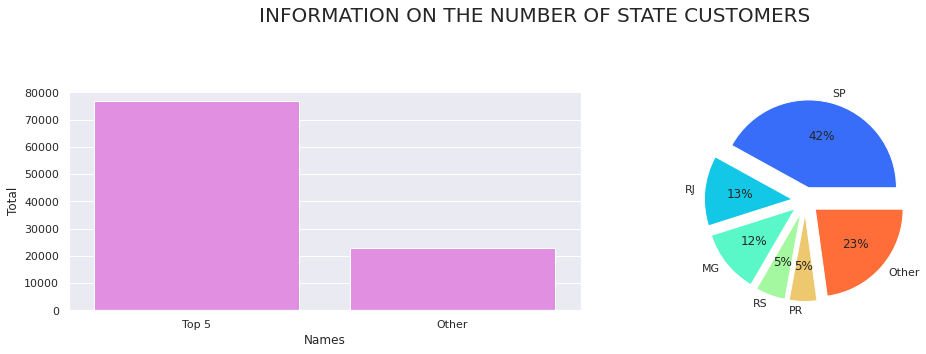

In [4]:
fig, axs = plt.subplots(1,2, figsize=(15,5))

sns.barplot(data=compare_top_5_other, x='Names',y='Total', color='violet', ax=axs[0])
colors = sns.color_palette('rainbow')
explode = [0.15] * len(counts_customer_state)
axs[1].pie(data=counts_customer_state, x = 'total', labels=counts_customer_state.code, 
           colors=colors, autopct = '%0.0f%%', explode=explode)

fig.suptitle('information on the number of state customers\n\n'.upper(), fontsize=20)
plt.tight_layout()
plt.show()

In [5]:
compare_top_5_other

,Names,Total,Count,%
0,Top 5,76744,5,77.18
1,Other,22697,22,22.82


In [8]:
counts_customer_state = counts_customer_state.reset_index(drop=True)
filter_top_five_customer = raw_customer_csv.loc[raw_customer_csv.customer_state.isin(counts_customer_state.code.to_numpy())]
customer_by_city_count = filter_top_five_customer.groupby(['customer_state','customer_city']).count().customer_id.reset_index()
customer_by_city_count.head()

,customer_state,customer_city,customer_id
0,MG,abadia dos dourados,3
1,MG,abaete,12
2,MG,abre campo,6
3,MG,acaiaca,2
4,MG,acucena,1


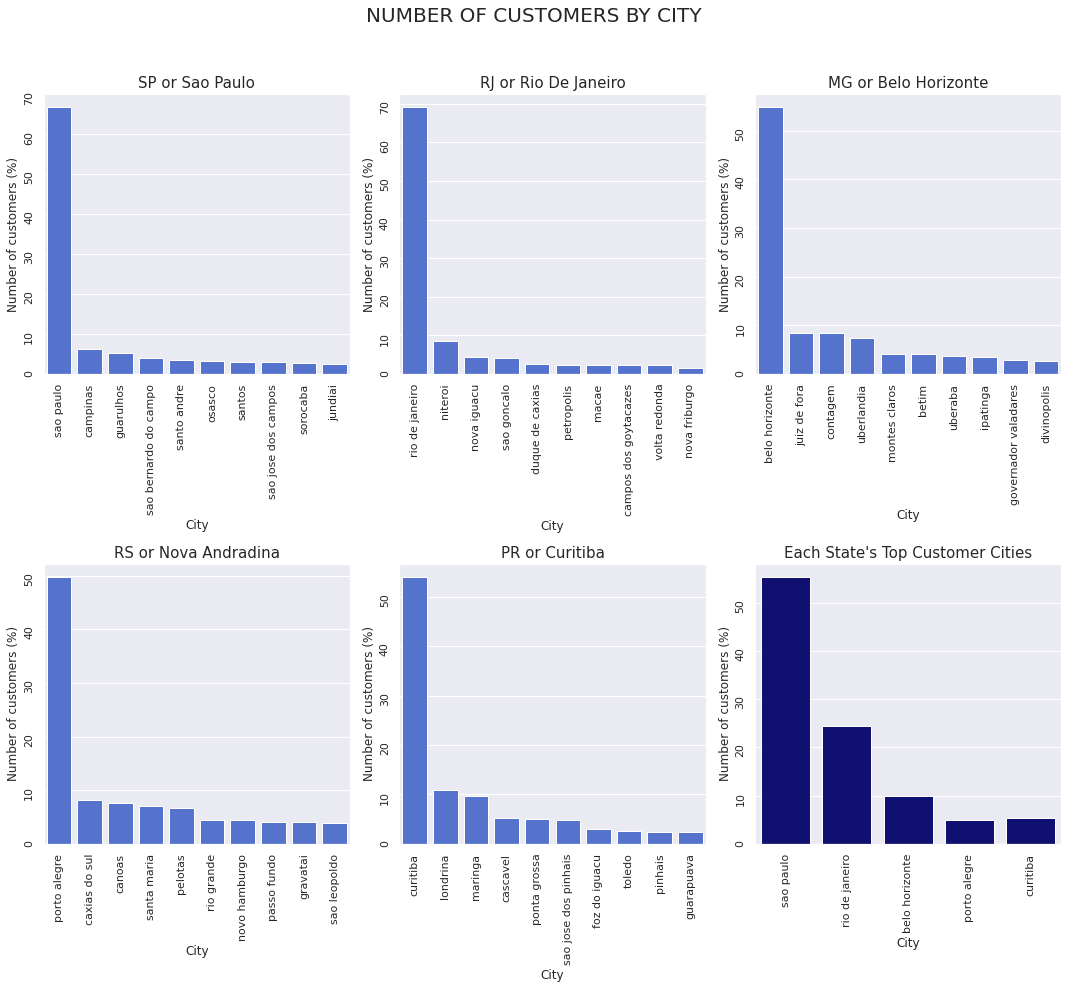

In [9]:
compare_each_top_city = []

customer_uq = customer_by_city_count.customer_state.unique()
len_customer = len(customer_uq)
total_col = 3
total_row = len_customer//total_col
if len_customer % total_col > 0:
    total_row += 1
    
idx = 0
fig, axs = plt.subplots(total_row, total_col, figsize=(15,total_row * 7))
for i in range(total_row):
    for j in range(total_col):
        if idx < len_customer:
            city_selected = counts_customer_state.loc[idx].code
            data_plot = customer_by_city_count.loc[customer_by_city_count.customer_state == city_selected].sort_values(
                by='customer_id', ascending=False)[:10].reset_index(drop=True)
            
            if len(compare_each_top_city) == 0:
                compare_each_top_city = [data_plot.loc[0].to_numpy().tolist()]
            else:
                compare_each_top_city.append(data_plot.loc[0].to_numpy().tolist())
                
            total = data_plot.customer_id.sum()
            data_plot.customer_id = round((data_plot.customer_id/total) * 100,2)
            sns.barplot(data=data_plot,
                       x = 'customer_city', y='customer_id', ax = axs[i][j], color='royalblue')
            axs[i][j].set_xlabel('City')
            axs[i][j].set_ylabel('Number of customers (%)')
            city_name = raw_geoloc_csv.loc[raw_geoloc_csv.geolocation_state == city_selected]\
                .reset_index(drop=True).loc[0].geolocation_city
            axs[i][j].set_title(city_selected+' or '+city_name.title(), fontsize=15)
            axs[i][j].tick_params(rotation=90)
            idx += 1

i=1
j=2
data_top_city_each_cs = pd.DataFrame(data=compare_each_top_city, columns=customer_by_city_count.columns.values)
total = data_top_city_each_cs.customer_id.sum()
data_top_city_each_cs.customer_id = round((data_top_city_each_cs.customer_id/total) * 100,2)

sns.barplot(data=data_top_city_each_cs, x='customer_city', y='customer_id', 
            ax=axs[i][j], color='navy')
axs[i][j].set_xlabel('City')
axs[i][j].set_ylabel('Number of customers (%)')
axs[i][j].set_title('Each State\'s Top Customer Cities', fontsize=15)
axs[i][j].tick_params(rotation=90)

fig.suptitle('Number of customers by city\n\n'.upper(), fontsize=20)
plt.tight_layout()
plt.show()

# Transaction

In [29]:
raw_order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [30]:
raw_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [31]:
raw_order_items.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


Ce fichier regroupe les entêtes de commandes, identifiées par un order_id unique et rattaché à un client par le customer_id.

_Variables importantes du dataset regroupant les lignes de commande :_

- **order_id** : Identifiant unique de la commande
- **order_item_id** : Identifiant séquentiel des items d'une même commande (lignes de commande)
- **product_id** : Identifiant unique du produit
- **seller_id** : Identifiant unique du vendeur
- **price** : Prix de la ligne de commande
- **freight_value** : Coût de fret de la ligne (Si plusieurs lignes, le coût de fret est réparti entre toutes les lignes)

In [11]:
bins = 10
vc_order_item = raw_order_items.order_id.value_counts()
count_hist, range_hist = np.histogram(vc_order_item, bins=bins)
range_order_item = [] 

for i, _range in enumerate(range_hist):
    if i < len(count_hist):
        if i == 0:
            range_order_item = [[str(int(_range)) + '-'+str(int(range_hist[i+1])), count_hist[i]]]
        else:
            range_order_item.append([str(int(_range)) + '-'+str(int(range_hist[i+1])), count_hist[i]]) 

pd_range_order = pd.DataFrame(data=range_order_item, columns=['Range','Total'])
print('This table shows the number of items ordered for each transaction,\n\
the most ranging from 1-3 items, 3-5 items and so on\n')
pd_range_order

This table shows the number of items ordered for each transaction,
the most ranging from 1-3 items, 3-5 items and so on



,Range,Total
0,1-3,96379
1,3-5,1827
2,5-7,402
3,7-9,30
4,9-11,11
5,11-13,9
6,13-15,3
7,15-17,2
8,17-19,0
9,19-21,3


In [12]:
raw_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [13]:
raw_order.order_purchase_timestamp = pd.to_datetime(raw_order.order_purchase_timestamp)
raw_order.order_approved_at = pd.to_datetime(raw_order.order_approved_at)
raw_order.order_delivered_carrier_date = pd.to_datetime(raw_order.order_delivered_carrier_date)
raw_order.order_delivered_customer_date = pd.to_datetime(raw_order.order_delivered_customer_date)
raw_order.order_estimated_delivery_date = pd.to_datetime(raw_order.order_estimated_delivery_date)
raw_order.order_status = raw_order.order_status.astype('category')
raw_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  category      
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](5), object(2)
memory usage: 5.4+ MB


In [14]:
raw_order.order_status.value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [15]:
success_order = raw_order.loc[(raw_order.order_status == 'delivered') \
                              | (raw_order.order_status == 'shipped')]
display(success_order.head(1))
print(success_order.shape)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18


(97585, 8)


In [16]:
success_order.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  14
order_delivered_carrier_date        2
order_delivered_customer_date    1115
order_estimated_delivery_date       0
dtype: int64

In [17]:
print('before', success_order.shape)
success_order = success_order.merge(raw_order_items, how='inner',on='order_id')
print('after', success_order.shape)

before (97585, 8)
before (111382, 14)


The number of rows of data after merging the dataframe has increased. This is because there are several orders on olist_order_items_dataset which have the same order_id.

In [18]:
success_order.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value'],
      dtype='object')


Comparison of transactions that occurred in 2016 to 2018 has always increased




,index,delivered_order_year
0,2016,327
1,2017,50122
2,2018,60933


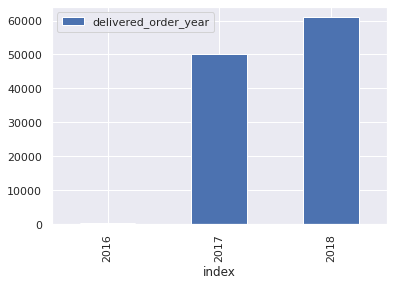

In [19]:
print('\nComparison of transactions that occurred in 2016 to 2018 has always increased\n\n')
success_order['delivered_order_year'] = \
pd.DatetimeIndex(success_order.order_purchase_timestamp).year.values.astype(int)
success_order['delivered_order_month'] = \
pd.DatetimeIndex(success_order.order_purchase_timestamp).month.values.astype(int)

vc = success_order.delivered_order_year.value_counts().sort_values() 
vc.reset_index().plot.bar(x='index', y='delivered_order_year')
vc.reset_index()

,delivered_order_year,delivered_order_month,order_id
0,2016,9,5
1,2016,10,321
2,2016,12,1


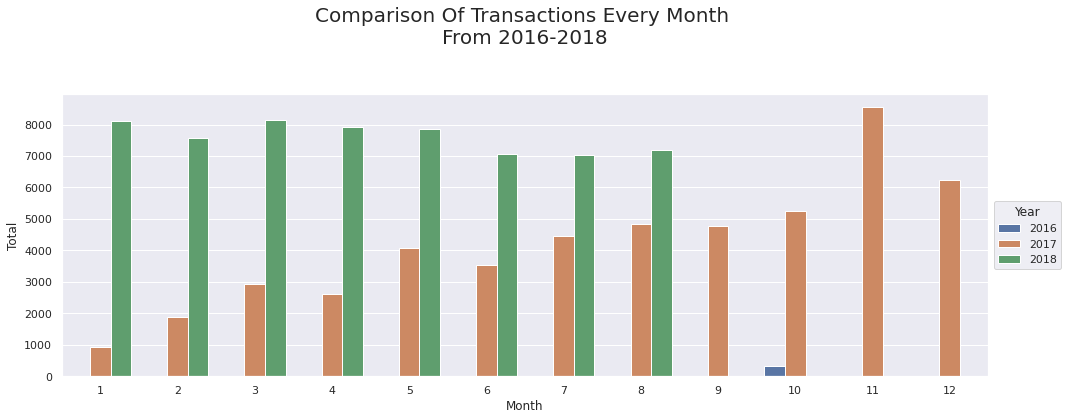

In [20]:
_data = success_order.groupby(['delivered_order_year','delivered_order_month'])\
.count()['order_id'].reset_index()
display(_data.loc[_data.delivered_order_year == 2016])
plt.figure(figsize=(15,6))
sns.barplot(data = _data, x='delivered_order_month', y='order_id',
            hue='delivered_order_year')
plt.xlabel('Month')
plt.ylabel('Total')
plt.legend(title='Year', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('comparison of transactions every month \nfrom 2016-2018\n\n'.title(), fontsize=20)
plt.tight_layout()
plt.show()

# Transaction + Product

In [38]:
# olist_products_dataset
raw_product

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [39]:
raw_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [40]:
raw_product.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [21]:
success_order['total_order'] = np.ones(success_order.shape[0],np.int64)
df_sum_pivot = pd.pivot_table(success_order, values='total_order', 
               index='product_id',columns='delivered_order_year',aggfunc=['sum'], fill_value=0)
df_sum_pivot = df_sum_pivot['sum'].reset_index().sort_values(by=[2018,2017,2016], ascending=False)\
.reset_index(drop=True)
product_selected = []
for y in [2016, 2017, 2018]:
    df_selected = df_sum_pivot.sort_values(by=y, ascending=False)[['product_id', y]].head(50)
    if len(product_selected) == 0:
        product_selected = df_selected
    else:
        product_selected = product_selected.append(df_selected)

product_selected = product_selected.groupby('product_id').sum().sort_values([2018,2017,2016],\
                                                         ascending=False).reset_index()
sorting_cols =  raw_product.columns.values.tolist() + [2016, 2017, 2018]
# print(sorting_cols)
product_selected = product_selected.merge(raw_product, on='product_id')[['product_id', 'product_category_name'\
                                                     ,'product_weight_g',2016,2017,2018]]
print(product_selected.shape)
print('the unique name of the product ',len(product_selected.product_category_name.unique()),'\n')
display(product_selected.head(5))

(136, 6)
the unique name of the product  27 



,product_id,product_category_name,product_weight_g,2016,2017,2018
0,aca2eb7d00ea1a7b8ebd4e68314663af,moveis_decoracao,2600.0,0.0,114.0,413.0
1,3dd2a17168ec895c781a9191c1e95ad7,informatica_acessorios,533.0,0.0,0.0,274.0
2,53b36df67ebb7c41585e8d54d6772e08,relogios_presentes,584.0,0.0,66.0,257.0
3,d1c427060a0f73f6b889a5c7c61f2ac4,informatica_acessorios,6550.0,0.0,96.0,245.0
4,422879e10f46682990de24d770e7f83d,ferramentas_jardim,1550.0,0.0,276.0,208.0


In [22]:
df_vcorder = success_order.delivered_order_year.value_counts()\
.reset_index().rename(columns={'index':'year'})
df_vcorder['top_50'] = np.zeros(df_vcorder.shape[0])
df_vcorder['percent'] = np.zeros(df_vcorder.shape[0])
ar_top_50 = []
ar_percent = []
for idx in df_vcorder.index.values:
    total_year = df_vcorder.loc[idx]['delivered_order_year']
    year = df_vcorder.loc[idx]['year']
    totalp_by_year = product_selected[year].sum()
    ar_top_50.append(totalp_by_year)
    ar_percent.append(round(((totalp_by_year / total_year) * 100),2))
    
df_vcorder['top_50'] = ar_top_50
df_vcorder['percent'] = ar_percent

display(df_vcorder)
print('\n\nTotal product', raw_product.shape[0])

,year,delivered_order_year,top_50,percent
0,2018,60933,6287.0,10.32
1,2017,50122,5320.0,10.61
2,2016,327,133.0,40.67




Total product 32951


The table above shows a comparison of the number of 50 popular products to the total number of products. The results show that the 50 popular products account for ~10% of the total. This value is quite high because the number of products available in the dataset is 32951

In [42]:
raw_category # translation of product name category

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [43]:
products = pd.merge(raw_product, raw_category,
                    how="left",
                    on="product_category_name")

del_features_list = ["product_category_name", "product_weight_g",
                     "product_length_cm", "product_height_cm",
                     "product_width_cm"]
products.drop(del_features_list, axis=1, inplace=True)
products = products.rename(columns={"product_category_name_english":
                                    "product_category_name"})
products.head(3)

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,44.0,276.0,1.0,art
2,96bd76ec8810374ed1b65e291975717f,46.0,250.0,1.0,sports_leisure


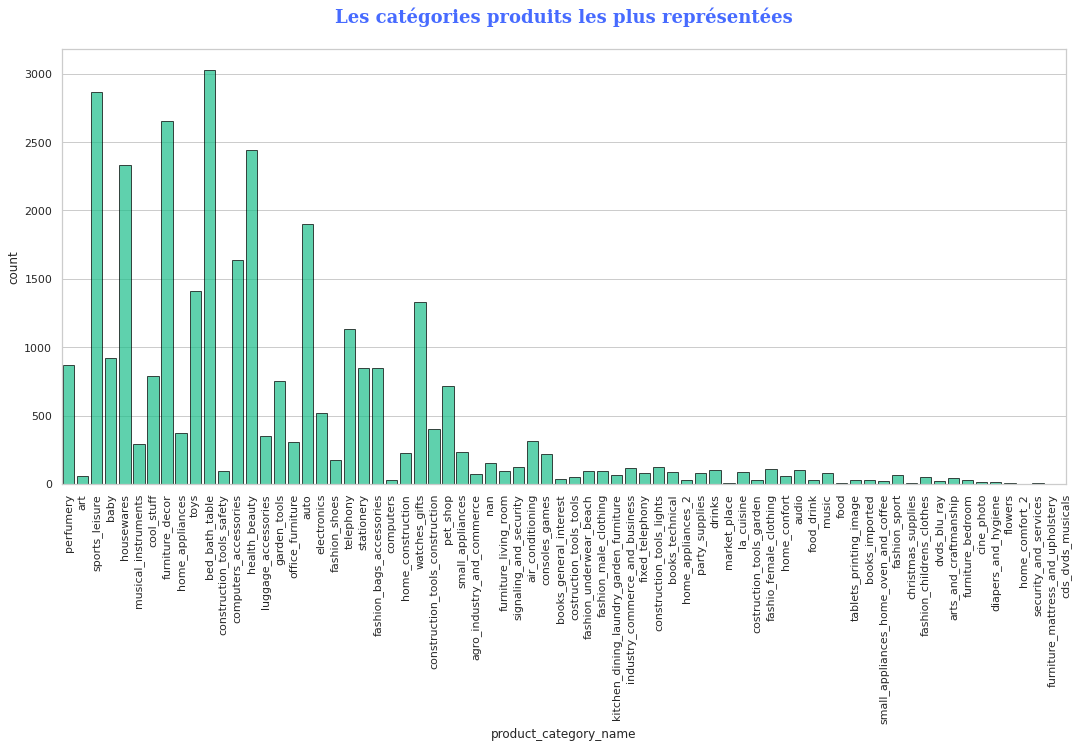

In [44]:
# Plot categories count in dataset
sns.set_style("whitegrid")
font_title = {"family": "serif",
              "color":  "#476bff",
              "weight": "bold",
              "size": 18}

fig = plt.figure(figsize=(18, 8))
sns.countplot(data=products, x="product_category_name",
              edgecolor="black",
              color="#00d994", alpha=0.7)
plt.xticks(range(0, products["product_category_name"].nunique()+1),
           products["product_category_name"].unique(),
           rotation=90)
plt.title(f"Les catégories produits les plus représentées\n",
          fontdict=font_title)
plt.show()

,customer_state,customer_city,number of customers (%)
0,SP,sao paulo,55.31
1,RJ,rio de janeiro,24.50
2,MG,belo horizonte,9.87
3,RS,porto alegre,4.91
4,PR,curitiba,5.41


I will pick up 10 popular products in each city




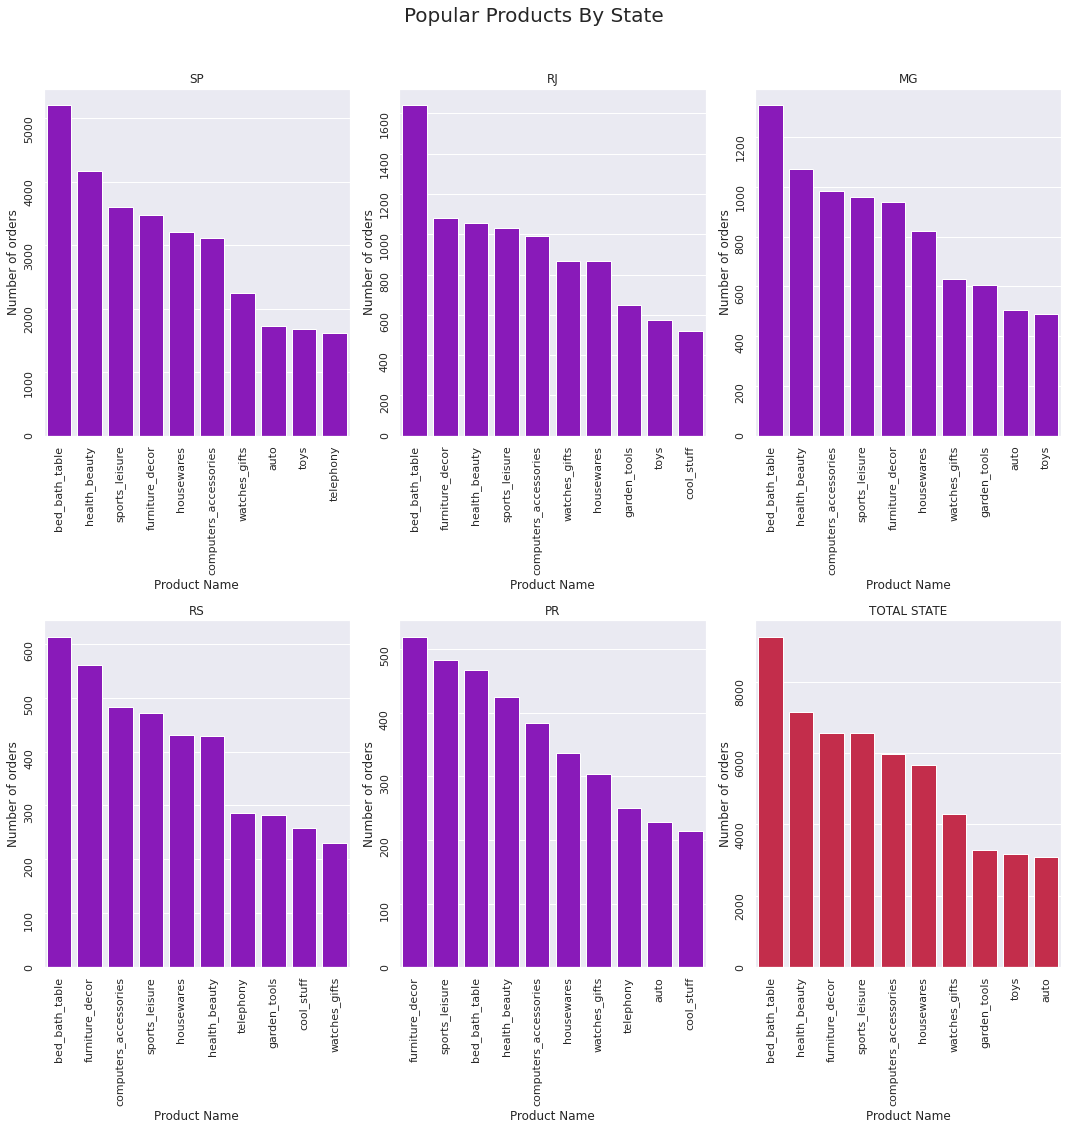

In [23]:
df_city = data_top_city_each_cs.rename(columns={'customer_id':'number of customers (%)'})
display(df_city)
print('I will pick up 10 popular products in each city\n\n')
ar_state = df_city.customer_state.to_numpy()
df_customer = success_order.merge(raw_customer_csv, on='customer_id')
df_customer = df_customer.loc[df_customer.customer_state.isin(ar_state)]
df_customer_pivot = pd.pivot_table(df_customer, index='product_id', columns='customer_state',
                                  aggfunc='sum', values='total_order', fill_value=0).reset_index()\
                    .sort_values(ar_state.tolist(), ascending=False).reset_index(drop=True)
# df_customer_pivot
df_customer = df_customer_pivot\
.merge(raw_product[['product_id','product_category_name']], on='product_id')\
.groupby('product_category_name').sum().reset_index().merge(raw_category, on='product_category_name')
df_customer['total'] = df_customer[ar_state].sum(axis=1)

total_columns = 3
total_row = int(len(ar_state)//total_columns)
if len(ar_state) % total_columns > 0:
    total_row += 1

idx = 0
# print(total_row, total_columns)
fig, axs = plt.subplots(total_row, total_columns, figsize=(15, total_row*8))

for i in range(total_row):
    for j in range(total_columns):
        if idx < len(ar_state):
            state = ar_state[idx]
            df_data = df_customer.sort_values(by=state,ascending=False).head(10).reset_index()
            sns.barplot(data = df_data, x='product_category_name_english', y=state , ax=axs[i][j], 
                        color='darkviolet')
            axs[i][j].set_title(state)
            axs[i][j].set_xlabel('Product Name', fontsize=12)
            axs[i][j].set_ylabel('Number of orders', fontsize=12)
            axs[i][j].tick_params(rotation=90)
            
            idx += 1

i = 1
j = 2

df_data = df_customer.sort_values(by='total',ascending=False).head(10).reset_index()
sns.barplot(data = df_data, x='product_category_name_english', y='total' , ax=axs[i][j], 
            color='crimson')
axs[i][j].set_title('total state'.upper())
axs[i][j].set_xlabel('Product Name', fontsize=12)
axs[i][j].set_ylabel('Number of orders', fontsize=12)
axs[i][j].tick_params(rotation=90)

fig.suptitle('Popular products by state\n\n'.title(), fontsize=20)
plt.tight_layout()
plt.show()

Based on the above information,

- The bed_bath_table category is the number one category in almost all states apart from PR
- Health_beauty category is the second most ordered product. Specifically, this product has the most customers in the states of SP and MG.
- The number of customers for furniture_decor and sports_leisure is almost the same. if explained specifically, the number of furniture_decor customers in the state of RS is superior while other states (SP, RJ, MJ, PR) have an insignificant comparison

# Payment

In [33]:
raw_payment

,order_id,payment_sequential,payment_type,payment_installments,payment_value,amount_of_usage
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,1.0
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,1.0
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,1.0
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,1.0
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,1.0
...,...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31,1.0
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80,1.0
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77,1.0
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54,1.0


In [34]:
raw_payment.describe()

,payment_sequential,payment_installments,payment_value,amount_of_usage
count,103886.000000,103886.000000,103886.000000,103886.0
mean,1.092679,2.853349,154.100380,1.0
std,0.706584,2.687051,217.494064,0.0
min,1.000000,0.000000,0.000000,1.0
25%,1.000000,1.000000,56.790000,1.0
50%,1.000000,1.000000,100.000000,1.0
75%,1.000000,4.000000,171.837500,1.0
max,29.000000,24.000000,13664.080000,1.0


In [32]:
raw_payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
 5   amount_of_usage       103886 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 4.8+ MB


- payment_sequential : Si plusieurs méthodes de paiement appliquées, une ligne est crée par moyen utilisé.
- payment_installments : Nombre de versements choisis

In [24]:
raw_payment_summary = raw_payment['amount_of_usage'] = np.ones(raw_payment.shape[0])
raw_payment_summary = pd.pivot_table(raw_payment, values=['amount_of_usage','payment_value'], index='payment_type',
               aggfunc='sum', fill_value=0)
total_amoount = raw_payment_summary.amount_of_usage.sum()
total_pay = raw_payment_summary.payment_value.sum()

raw_payment_summary['amount_of_usage_in_%'] = round(((raw_payment_summary.amount_of_usage/
                                                      total_amoount) * 100),2)
raw_payment_summary['payment_value_in_%'] = round(((raw_payment_summary.payment_value/
                                                      total_pay) * 100),2)
raw_payment_summary

,amount_of_usage,payment_value,amount_of_usage_in_%,payment_value_in_%
payment_type,,,,
boleto,19784,2869361.27,19.04,17.92
credit_card,76795,12542084.19,73.92,78.34
debit_card,1529,217989.79,1.47,1.36
not_defined,3,0.00,0.00,0.00
voucher,5775,379436.87,5.56,2.37


Based on the information from the table above,

- The most frequently used type of payment is credit_card followed by boleto, voucher, and debit_card both in terms of usage amount and value
- It can be ensured that the number of uses and the value of the credit_card payment type is superior in each state because the value provided is more than 70%

# Reviews

In [35]:
raw_reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [36]:
raw_reviews.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [37]:
raw_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
